<a href="https://colab.research.google.com/github/ArogeG/Python-Artificial-Intelligence-Projects-for-Beginners/blob/Project-1/Copy_of_Student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: clone https://github.com/ArogeG/Python-Artificial-Intelligence-Projects-for-Beginners.git

!git clone https://github.com/ArogeG/Python-Artificial-Intelligence-Projects-for-Beginners.git


Cloning into 'Python-Artificial-Intelligence-Projects-for-Beginners'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 78 (delta 7), reused 10 (delta 4), pack-reused 64 (from 1)
Receiving objects: 100% (78/78), 3.84 MiB | 5.16 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [ ]:
import os
os.chdir('/content/Python-Artificial-Intelligence-Projects-for-Beginners/Chapter01/dataset')


In [ ]:
# load dataset (student Portuguese scores)
import pandas as pd
d = pd.read_csv('student-por.csv', sep=';')
len(d)

649

In [ ]:
# prompt: view top ten rows

d.head(10)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [ ]:
# generate binary label (pass/fail) based on G1+G2+G3 (test grades, each 0-20 pts); threshold for passing is sum>=30
d['pass'] = d.apply(lambda row: 1 if (row['G1']+row['G2']+row['G3']) >= 35 else 0, axis=1)
d = d.drop(['G1', 'G2', 'G3'], axis=1)
d.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,pass
283,16,3,3,3,2,1,5,3,3,1,...,False,True,False,False,True,False,True,True,False,0
426,15,3,3,2,1,0,5,4,4,2,...,False,False,True,False,True,False,True,True,False,0
77,16,2,2,1,4,0,5,2,3,1,...,False,False,True,False,True,False,True,False,True,1
34,16,3,2,1,1,0,5,4,3,1,...,False,True,False,False,True,False,True,True,False,1
207,16,3,3,1,1,0,4,3,2,3,...,True,False,True,False,True,False,True,True,False,0


In [ ]:
# use one-hot encoding on categorical columns
d = pd.get_dummies(d, columns=['sex', 'school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                               'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                               'nursery', 'higher', 'internet', 'romantic'])
d.head()

KeyError: "None of [Index(['sex', 'school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',\n       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',\n       'nursery', 'higher', 'internet', 'romantic'],\n      dtype='object')] are in the [columns]"

In [ ]:
# shuffle rows
d = d.sample(frac=1)
# split training and testing data
d_train = d[:500]
d_test = d[500:]

d_train_att = d_train.drop(['pass'], axis=1)
d_train_pass = d_train['pass']

d_test_att = d_test.drop(['pass'], axis=1)
d_test_pass = d_test['pass']

d_att = d.drop(['pass'], axis=1)
d_pass = d['pass']

# number of passing students in whole dataset:
import numpy as np
print("Passing: %d out of %d (%.2f%%)" % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass)) / len(d_pass)))

Passing: 328 out of 649 (50.54%)


In [ ]:
# fit a decision tree
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
t = t.fit(d_train_att, d_train_pass)

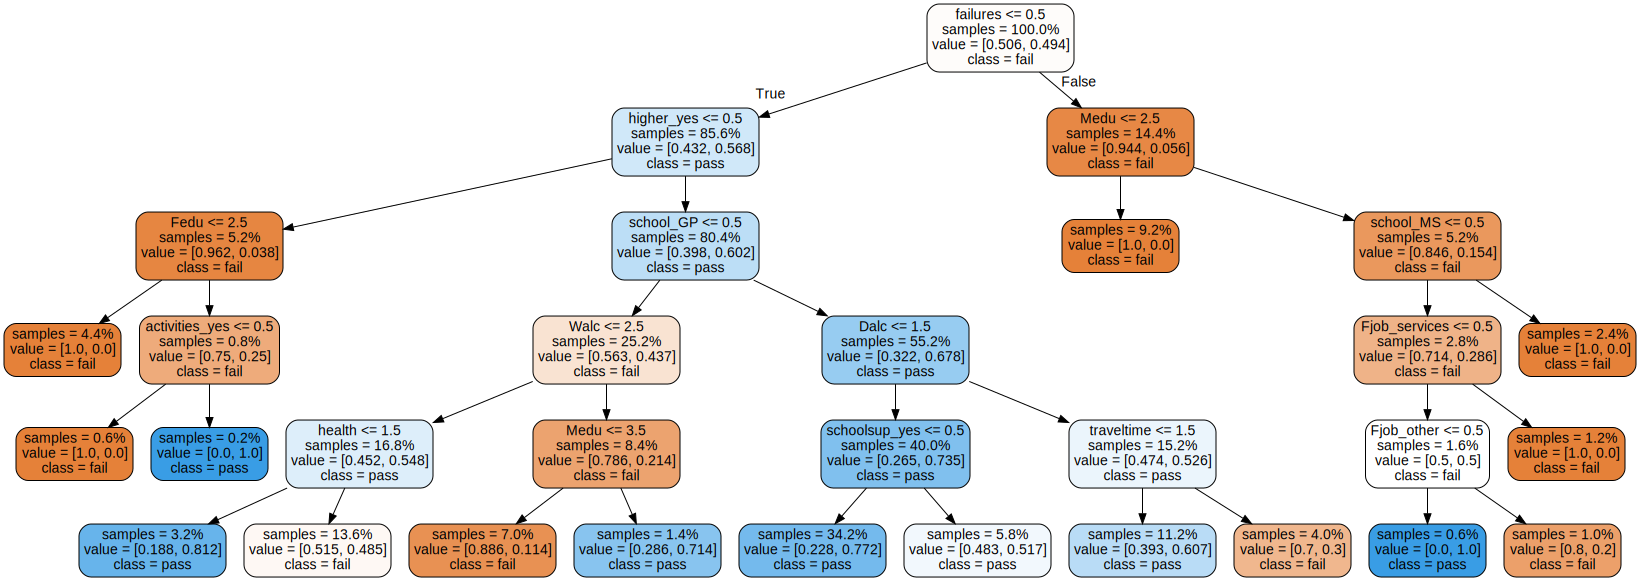

In [ ]:
# visualize tree
import graphviz
dot_data = tree.export_graphviz(t, out_file=None, label="all", impurity=False, proportion=True,
                                feature_names=list(d_train_att), class_names=["fail", "pass"],
                                filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# save tree
tree.export_graphviz(t, out_file="student-performance.dot", label="all", impurity=False, proportion=True,
                     feature_names=list(d_train_att), class_names=["fail", "pass"],
                     filled=True, rounded=True)

In [ ]:
t.score(d_test_att, d_test_pass)

0.7315436241610739

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(t, d_att, d_pass, cv=5)
# show average score and +/- two standard deviations away (covering 95% of scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.69 (+/- 0.06)


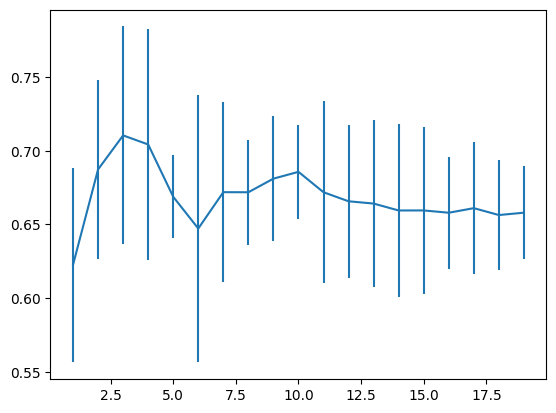

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])
plt.show()

In [ ]:
# prompt: print classification report

from sklearn.metrics import classification_report
t.fit(d_train_att, d_train_pass)
y_pred = t.predict(d_test_att)
y_test = d_test_pass

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.63      0.79      0.70        68
           1       0.78      0.60      0.68        81

    accuracy                           0.69       149
   macro avg       0.70      0.70      0.69       149
weighted avg       0.71      0.69      0.69       149



In [ ]:
# prompt: print the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[54 14]
 [32 49]]


In [ ]:
depth_acc = np.empty((19,3), float)
i = 0
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    depth_acc[i,0] = max_depth
    depth_acc[i,1] = scores.mean()
    depth_acc[i,2] = scores.std() * 2
    i += 1

depth_acc

array([[ 1.        ,  0.62257603,  0.06582266],
       [ 2.        ,  0.68728682,  0.06067724],
       [ 3.        ,  0.71036374,  0.07389675],
       [ 4.        ,  0.70422182,  0.07859402],
       [ 5.        ,  0.6687418 ,  0.02820843],
       [ 6.        ,  0.64719141,  0.09086315],
       [ 7.        ,  0.6718545 ,  0.06098184],
       [ 8.        ,  0.6718068 ,  0.03568044],
       [ 9.        ,  0.68103757,  0.04223098],
       [10.        ,  0.68565295,  0.03202528],
       [11.        ,  0.6718068 ,  0.06188139],
       [12.        ,  0.6656768 ,  0.05202111],
       [13.        ,  0.66412642,  0.0565803 ],
       [14.        ,  0.65943948,  0.05876299],
       [15.        ,  0.65946333,  0.05650805],
       [16.        ,  0.65791294,  0.03796156],
       [17.        ,  0.66101371,  0.04463823],
       [18.        ,  0.65635063,  0.03758446],
       [19.        ,  0.65793679,  0.03154424]])

In [ ]:
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std() * 2))

Max depth: 1, Accuracy: 0.62 (+/- 0.07)
Max depth: 2, Accuracy: 0.69 (+/- 0.06)
Max depth: 3, Accuracy: 0.71 (+/- 0.07)
Max depth: 4, Accuracy: 0.70 (+/- 0.09)
Max depth: 5, Accuracy: 0.68 (+/- 0.04)
Max depth: 6, Accuracy: 0.65 (+/- 0.08)
Max depth: 7, Accuracy: 0.66 (+/- 0.04)
Max depth: 8, Accuracy: 0.68 (+/- 0.05)
Max depth: 9, Accuracy: 0.68 (+/- 0.02)
Max depth: 10, Accuracy: 0.68 (+/- 0.05)
Max depth: 11, Accuracy: 0.67 (+/- 0.06)
Max depth: 12, Accuracy: 0.65 (+/- 0.07)
Max depth: 13, Accuracy: 0.65 (+/- 0.04)
Max depth: 14, Accuracy: 0.67 (+/- 0.06)
Max depth: 15, Accuracy: 0.66 (+/- 0.05)
Max depth: 16, Accuracy: 0.67 (+/- 0.04)
Max depth: 17, Accuracy: 0.66 (+/- 0.05)
Max depth: 18, Accuracy: 0.65 (+/- 0.04)
Max depth: 19, Accuracy: 0.66 (+/- 0.03)


In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
!git config --global user.email "your_email@example.com"
!git config --global user.name "Your Name"
!git add .
!git commit -m "Commit message"
!git push origin your_branch_name

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@ec078c4b9cd8.(none)')
error: src refspec your_branch_name does not match any
error: failed to push some refs to 'https://github.com/ArogeG/Python-Artificial-Intelligence-Projects-for-Beginners.git'


In [ ]:
!git branch
!git checkout -b Project-1

* master
Switched to a new branch 'Project-1'
